<a href="https://colab.research.google.com/github/Daan0112/Bachelorthesis/blob/main/EDA_Assignement_CD4_TYF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Import data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bachelorproef/Data/TYF_CD4_AIM4_panel_TYF_only_v01.csv')
df

,Vaccinee,Time_Point,Run,Tnaive_response,TSCM_response,Tcm_response,Tem_response,Temra_response
0,TYF01,1,1.0,0.000000,0.023805,0.135702,0.0,0.016909
1,TYF01,22,1.0,0.000000,1.155476,2.760006,0.0,0.178442
2,TYF01,43,1.0,4.342963,0.242814,0.612877,0.0,0.077171
3,TYF02,1,1.0,0.439183,0.001589,0.084037,0.0,0.036955
4,TYF02,22,1.0,3.845968,1.244919,1.556742,0.0,0.224511
...,...,...,...,...,...,...,...,...
160,TYF48,43,6.0,2.720671,0.248177,0.399798,0.0,0.115627
161,TYF49,1,6.0,0.000000,0.000000,0.000000,0.0,0.000000
162,TYF49,22,6.0,2.984828,0.639486,0.470363,0.0,0.187224
163,TYF49,43,6.0,8.360503,0.373567,0.116231,0.0,0.044818


# Task 1 - Sanity checks & structure

### Goal: Understand what is in the dataset and check for obvious problems.
- Load the CSV with Python (e.g. using pandas).
- Print:
  -	Number of rows.
  -	Number of unique Vaccinee.
  -	Unique Time_Point values.
- For each Time_Point, count how many rows (subjects) you have.
- For each subset
(Tnaive_response, TSCM_response, TCM_response, TEM_response, TEMRA_response):
  - Compute overall min, max.
  - Check if there are any negative values or NaN.
  - Explicitly check if TEM_response is always 0 and report this.

#### Deliverable 1 (text + table):
- A short paragraph (5–10 lines) describing:
  - How many subjects.
  - Which time points exist.
  - Any obvious issues (e.g. subsets always zero, missing values).
- A small table (see document)


In [ ]:
# @title
print(f"Number of rows: {len(df)}")
print(f"Number of unique Vaccinee: {df['Vaccinee'].nunique()}")
print(f"Unique Vaccinee values: {df['Vaccinee'].unique().tolist()}")
print(f"Number of unique Time_Point values: {df['Time_Point'].nunique()}")
print(f"Unique Time_Point values: {df['Time_Point'].unique().tolist()}")
print('Rows per Time_Point:')
print(df['Time_Point'].value_counts().sort_index())

response_columns = ['Tnaive_response', 'TSCM_response', 'Tcm_response', 'Tem_response', 'Temra_response']

print('\n--- Response Column Sanity Checks ---')
for col in response_columns:
    print(f'\nColumn: {col}')
    col_min = df[col].min()
    col_max = df[col].max()
    col_has_neg = (col_min < 0)
    col_has_nan = df[col].isnull().any()

    print(f'  Min value: {col_min}')
    print(f'  Max value: {col_max}')
    print(f'  Contains negative values: {col_has_neg}')
    print(f'  Contains NaN values: {col_has_nan}')

    if col == 'Tem_response':
        tem_is_always_zero = (col_max == 0 and col_min == 0)
        print(f'  TEM_response is always 0: {tem_is_always_zero}')

Number of rows: 165
Number of unique Vaccinee: 48
Unique Vaccinee values: ['TYF01', 'TYF02', 'TYF03', 'TYF04', 'TYF05', 'TYF06', 'TYF07', 'TYF08', 'TYF09', 'TYF10', 'TYF11', 'TYF12', 'TYF13', 'TYF14', 'TYF15', 'TYF16', 'TYF17', 'TYF18', 'TYF19', 'TYF20', 'TYF21', 'TYF22', 'TYF23', 'TYF24', 'TYF25', 'TYF26', 'TYF27', 'TYF28', 'TYF29', 'TYF30', 'TYF31', 'TYF33', 'TYF34', 'TYF35', 'TYF36', 'TYF37', 'TYF38', 'TYF39', 'TYF40', 'TYF41', 'TYF42', 'TYF43', 'TYF44', 'TYF45', 'TYF46', 'TYF47', 'TYF48', 'TYF49']
Number of unique Time_Point values: 7
Unique Time_Point values: [1, 22, 43, 356, 15, 365, 29]
Rows per Time_Point:
Time_Point
1      48
15      1
22     47
29      1
43     47
356    15
365     6
Name: count, dtype: int64

--- Response Column Sanity Checks ---

Column: Tnaive_response
  Min value: 0.0
  Max value: 21.282706657466303
  Contains negative values: False
  Contains NaN values: False

Column: TSCM_response
  Min value: 0.0
  Max value: 1.244919066302455
  Contains negative valu

# Task 2 - time-course summary: median curves

### Goal: Describe the typical CD4 response over time for each subset.
- Group the data by Time_Point.
- for each Time_Point and each subset
(Tnaive, TSCM, TCM, TEMRA – you can ignore TEM because it is zero):
  - Compute median.
  - Compute IQR (25th and 75th percentiles).
- Create a plot:
  - x-axis: Time_Point (days).
  - y-axis: % AIM⁺ CD4.
  - One line per subset: Tnaive, TSCM, TCM, TEMRA (median values).
  - (Optional) shaded band = IQR.
  - Focus on 0–60 days on the x-axis.
- Optionally, make a second simple plot showing medians at long-term (~356/365 days).
#### Deliverable 2:
•	1–2 plots (median ± IQR vs time).
•	A summary table with key time points (see document)


Aggregated statistics (median, IQR) per Time_Point for response columns:
   Time_Point  Tnaive_response_median  Tnaive_response_25th_percentile  \
0           1                0.349116                         0.000000   
1          15                3.216090                         3.216090   
2          22                1.005180                         0.000000   
3          29                2.660948                         2.660948   
4          43                0.038853                         0.000000   

   Tnaive_response_75th_percentile  TSCM_response_median  \
0                         1.166235              0.000000   
1                         3.216090              0.161921   
2                         4.719661              0.218008   
3                         2.660948              0.000000   
4                         3.402079              0.171811   

   TSCM_response_25th_percentile  TSCM_response_75th_percentile  \
0                       0.000000                      

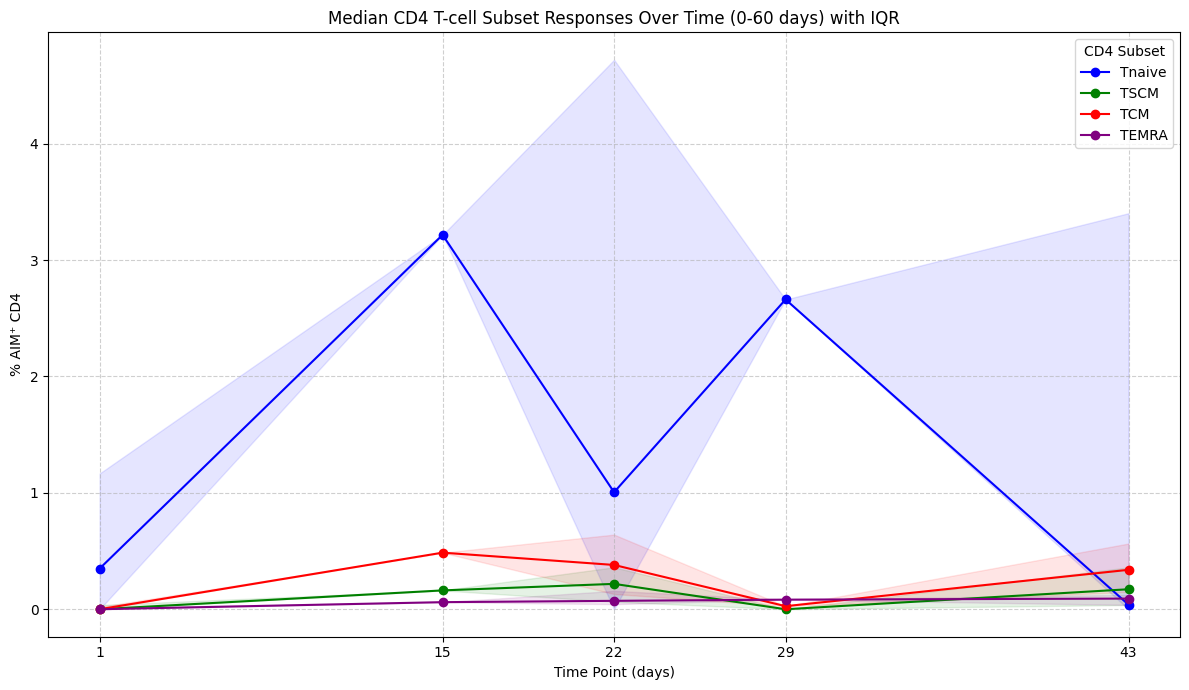

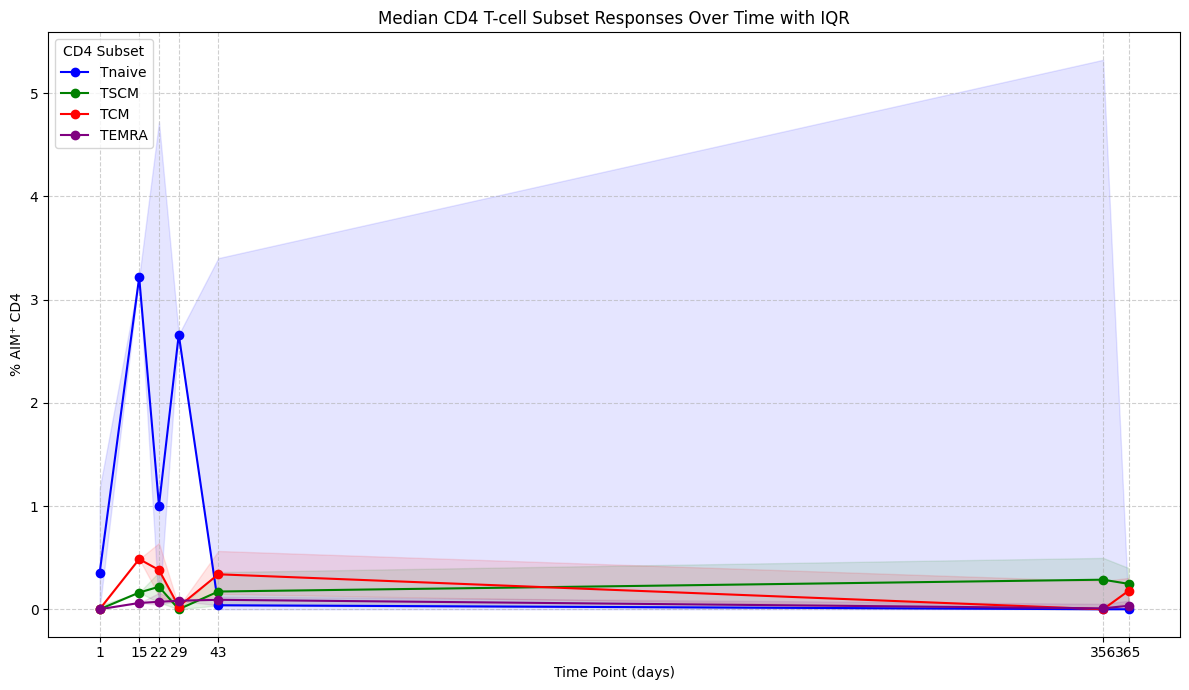

In [ ]:
# @title
response_columns_for_task2 = ['Tnaive_response', 'TSCM_response', 'Tcm_response', 'Temra_response']

# Group by Time_Point and calculate median, 25th, and 75th percentiles
summary_df = df.groupby('Time_Point')[response_columns_for_task2].agg(['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])

# Flatten the multi-level columns
summary_df.columns = ['_'.join(col).strip() for col in summary_df.columns.values]

# Rename percentile columns for clarity
summary_df = summary_df.rename(columns={
    col: col.replace('<lambda_0>', '25th_percentile').replace('<lambda_1>', '75th_percentile')
    for col in summary_df.columns
})

# Reset index to make Time_Point a column
summary_df = summary_df.reset_index()

print("Aggregated statistics (median, IQR) per Time_Point for response columns:")
print(summary_df.head())

# Prepare data for plotting for Time_Points <= 60
summary_df_60d = summary_df[summary_df['Time_Point'] <= 60].copy()

plt.figure(figsize=(12, 7))

colors = {'Tnaive_response': 'blue', 'TSCM_response': 'green', 'Tcm_response': 'red', 'Temra_response': 'purple'}
labels = {'Tnaive_response': 'Tnaive', 'TSCM_response': 'TSCM', 'Tcm_response': 'TCM', 'Temra_response': 'TEMRA'}

for col_prefix in ['Tnaive_response', 'TSCM_response', 'Tcm_response', 'Temra_response']:
    median_col = f'{col_prefix}_median'
    q25_col = f'{col_prefix}_25th_percentile'
    q75_col = f'{col_prefix}_75th_percentile'

    plt.plot(summary_df_60d['Time_Point'], summary_df_60d[median_col], label=labels[col_prefix], color=colors[col_prefix], marker='o')
    plt.fill_between(summary_df_60d['Time_Point'], summary_df_60d[q25_col], summary_df_60d[q75_col], color=colors[col_prefix], alpha=0.1)

plt.title('Median CD4 T-cell Subset Responses Over Time (0-60 days) with IQR')
plt.xlabel('Time Point (days)')
plt.ylabel('% AIM⁺ CD4')
plt.xticks(sorted(summary_df_60d['Time_Point'].unique())) # Ensure all existing time points are shown
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='CD4 Subset')
plt.tight_layout()
plt.show()

# Optionally, a second simple plot showing medians at long-term (~356/365 days).
plt.figure(figsize=(12, 7))

colors = {'Tnaive_response': 'blue', 'TSCM_response': 'green', 'Tcm_response': 'red', 'Temra_response': 'purple'}
labels = {'Tnaive_response': 'Tnaive', 'TSCM_response': 'TSCM', 'Tcm_response': 'TCM', 'Temra_response': 'TEMRA'}

for col_prefix in ['Tnaive_response', 'TSCM_response', 'Tcm_response', 'Temra_response']:
    median_col = f'{col_prefix}_median'
    q25_col = f'{col_prefix}_25th_percentile'
    q75_col = f'{col_prefix}_75th_percentile'

    plt.plot(summary_df['Time_Point'], summary_df[median_col], label=labels[col_prefix], color=colors[col_prefix], marker='o')
    plt.fill_between(summary_df['Time_Point'], summary_df[q25_col], summary_df[q75_col], color=colors[col_prefix], alpha=0.1)

plt.title('Median CD4 T-cell Subset Responses Over Time with IQR')
plt.xlabel('Time Point (days)')
plt.ylabel('% AIM⁺ CD4')
plt.xticks(sorted(summary_df['Time_Point'].unique())) # Ensure all existing time points are shown
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='CD4 Subset')
plt.tight_layout()
plt.show()

# Task 3 - Individual "spaghetti" trajectories

### Goal: See how much individuals differ from the median pattern.

For these subsets: TCM, TSCM, TEMRA, Tnaive:

-	For each subset, plot:
  -	x-axis: Time_Point.
  -	y-axis: % AIM⁺ for that subset.
  -	Each Vaccinee = one thin line (“spaghetti plot”).
  -	Optionally overlay the median as a thicker line.
### Deliverable 3:
-	3-4 spaghetti plots:
  -	TCM vs time
  -	TSCM vs time
  -	TEMRA vs time
  -	(optional) Tnaive vs time
-	Under each plot, write 1–2 sentences describing what you see
(for example: “Most subjects have an increase in TCM around day 22–43 and many keep a non-zero signal at 1 year.”).


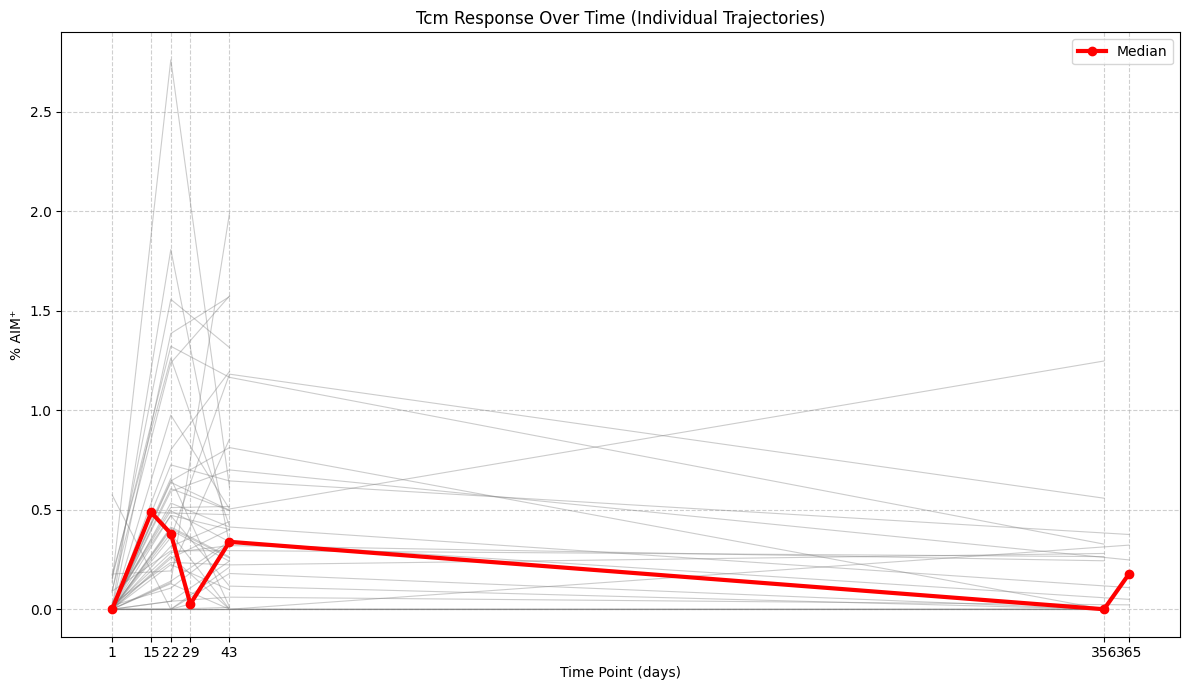

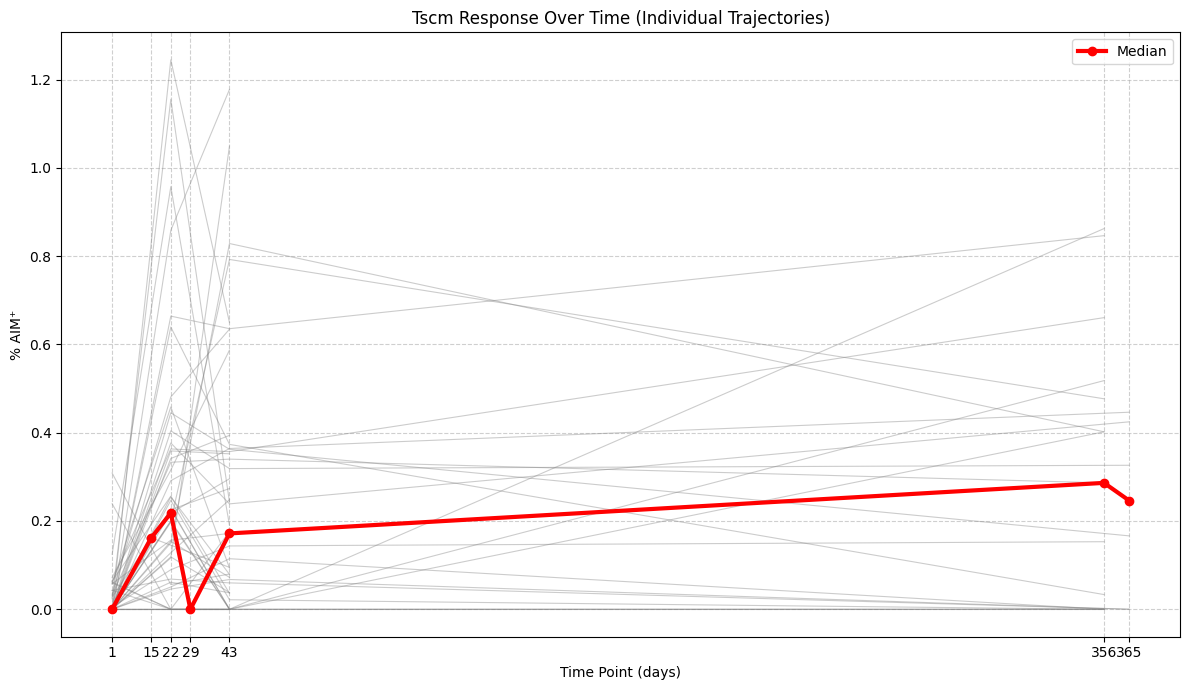

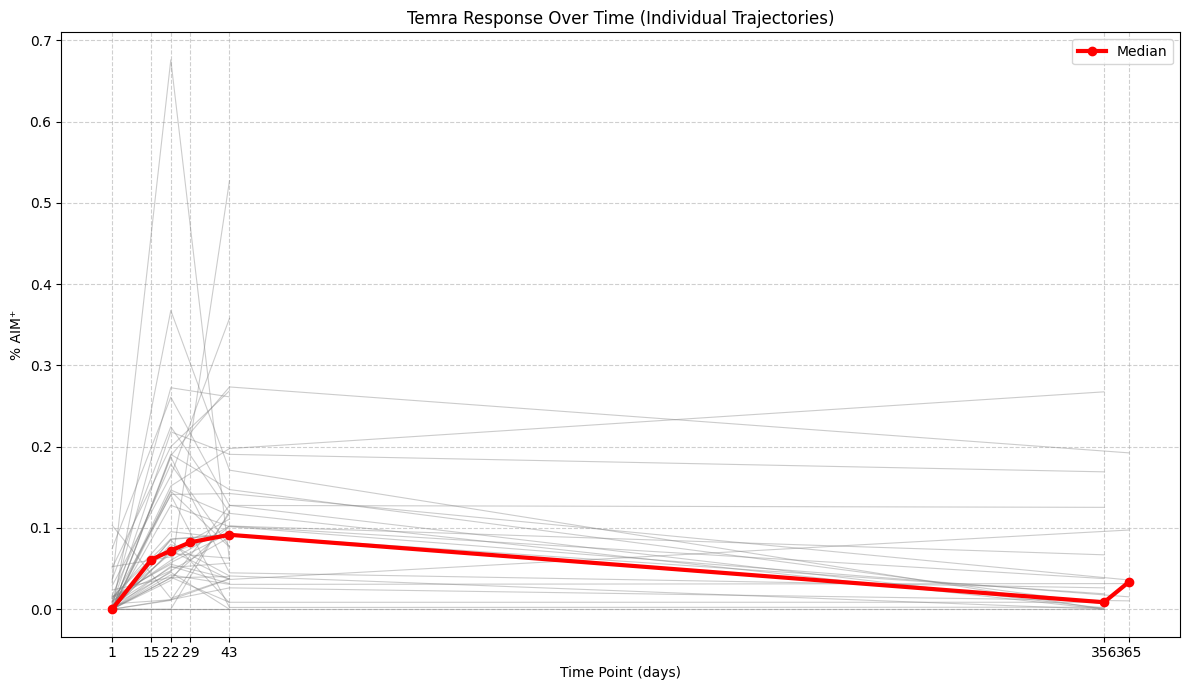

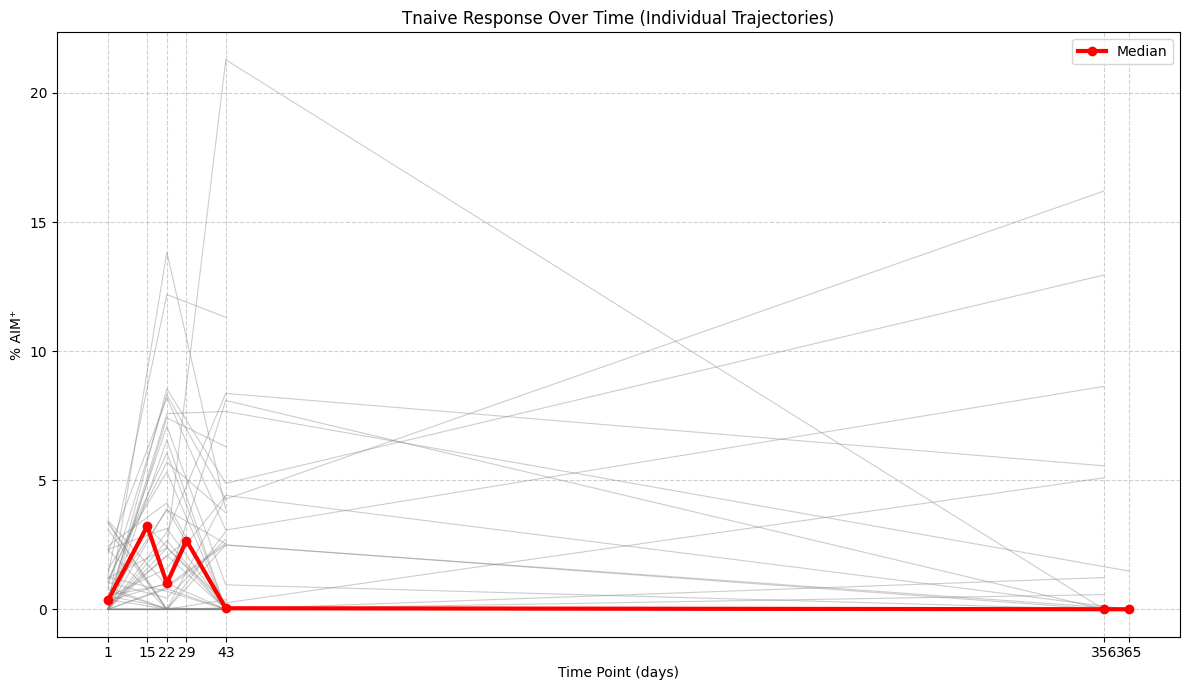

In [ ]:
# @title
# Define the response columns for this task
response_columns_spaghetti = ['Tcm_response', 'TSCM_response', 'Temra_response', 'Tnaive_response']

# Prepare data for plotting - get unique vaccinees for consistent coloring if desired
unique_vaccinees = df['Vaccinee'].unique()

for col in response_columns_spaghetti:
    plt.figure(figsize=(12, 7))

    # Plot individual trajectories
    # Use a muted color palette for individual lines to make the median stand out
    for vaccinee in unique_vaccinees:
        subset_df = df[df['Vaccinee'] == vaccinee]
        plt.plot(subset_df['Time_Point'], subset_df[col], color='grey', alpha=0.4, linewidth=0.8)

    # Overlay the median curve (from summary_df if available)
    median_col_name = f'{col}_median'
    if median_col_name in summary_df.columns:
        plt.plot(summary_df['Time_Point'], summary_df[median_col_name], color='red', linewidth=3, label='Median', marker='o')

    plt.title(f'{col.replace("_", " ").title()} Over Time (Individual Trajectories)')
    plt.xlabel('Time Point (days)')
    plt.ylabel('% AIM⁺')
    plt.xticks(sorted(df['Time_Point'].unique())) # Show all existing time points
    plt.grid(True, linestyle='--', alpha=0.6)
    if median_col_name in summary_df.columns:
        plt.legend()
    plt.tight_layout()
    plt.show()

# Task 4 - Define and count CD4 responders / persistence

Because TEM_response is always zero in this dataset, we define a total CD4 response:

total_CD4 = TSCM_response + TCM_response + TEMRA_response

Use these rules:
- Responder (CD4):

  A vaccinee is a responder if total_CD4 > 0.10% at any time point after day 1.
- Sustained responder:

  Among responders with a 1-year sample (day 356 or 365), call them sustained if:

  total_CD4 at 1y > 0.10%

- Short-lived responder:
  
  Responders who have a 1-year sample but
  total_CD4 at 1y ≤ 0.10%

### Tasks:

- For each vaccinee, compute:
  - is_responder (True/False),
  - is_sustained (True/False, if they have 1y data),
  - is_short_lived (True/False, if they have 1y data).
- Then count:
  - Total number of vaccinees.
  - Number and % of responders.
  - Among responders with 1-year data:
  - Number and % sustained.
  - Number and % short-lived.

### Deliverable 4:
- A small results table (see document)
- 1-2 barplots
(e.g. responders vs non-responders; sustained vs short-lived among responders with 1-year data).


In [ ]:
# @title
df['total_CD4'] = df['TSCM_response'] + df['Tcm_response'] + df['Temra_response']
print("Added 'total_CD4' column to the DataFrame. First 5 rows with new column:")

# Create dataframe with vaccinee's info
responder_threshold = 0.10
vaccinee_results = pd.DataFrame(index=df['Vaccinee'].unique())
vaccinee_results.index.name = 'Vaccinee'
# Add column with boolean "is_responder"
responders_after_day1 = df[df['Time_Point'] > 1].groupby('Vaccinee')['total_CD4'].apply(lambda x: (x > responder_threshold).any())
vaccinee_results['is_responder'] = responders_after_day1.fillna(False).astype(bool)
# Add column with boolean "has_1y_data"
year_one_timepoints = [356, 365]
year_one_data = df[df['Time_Point'].isin(year_one_timepoints)]
vaccinee_results['has_1y_data'] = False
year_one_vaccinees = year_one_data['Vaccinee'].unique()
vaccinee_results.loc[year_one_vaccinees, 'has_1y_data'] = True
# Initialize columns with booleans "is sustained" and "is_short_lived"
vaccinee_results['is_sustained'] = False
vaccinee_results['is_short_lived'] = False
# Fill in columns "is_sustained" and "is_short_lived"
for vaccinee in vaccinee_results[vaccinee_results['is_responder'] & vaccinee_results['has_1y_data']].index:
    vaccinee_year_one_df = year_one_data[year_one_data['Vaccinee'] == vaccinee]
    # Check if total_CD4 at ANY 1y time point > threshold
    if (vaccinee_year_one_df['total_CD4'] > responder_threshold).any():
        vaccinee_results.loc[vaccinee, 'is_sustained'] = True
    else:
        # If not sustained, and has 1y data, and is a responder, then short-lived
        vaccinee_results.loc[vaccinee, 'is_short_lived'] = True

# 5. Compute summary statistics
total_vaccinees = vaccinee_results.shape[0]
num_responders = vaccinee_results['is_responder'].sum()
perc_responders = (num_responders / total_vaccinees) * 100

responders_with_1y_data = vaccinee_results[vaccinee_results['is_responder'] & vaccinee_results['has_1y_data']]
num_responders_with_1y_data = responders_with_1y_data.shape[0]

num_sustained_responders = responders_with_1y_data['is_sustained'].sum()
# Ensure denominator is not zero to avoid division by zero error
perc_sustained_responders = (num_sustained_responders / num_responders_with_1y_data) * 100 if num_responders_with_1y_data > 0 else 0

num_short_lived_responders = responders_with_1y_data['is_short_lived'].sum()
perc_short_lived_responders = (num_short_lived_responders / num_responders_with_1y_data) * 100 if num_responders_with_1y_data > 0 else 0


print(f"\nTotal number of unique vaccinees: {total_vaccinees}")
print(f"Number of responders: {num_responders} ({perc_responders:.2f}%)")
print(f"\nAmong responders with 1-year data ({num_responders_with_1y_data} subjects):")
print(f"  Number sustained responders: {num_sustained_responders} ({perc_sustained_responders:.2f}%)")
print(f"  Number short-lived responders: {num_short_lived_responders} ({perc_short_lived_responders:.2f}%)")



Added 'total_CD4' column to the DataFrame. First 5 rows with new column:

Total number of unique vaccinees: 48
Number of responders: 44 (91.67%)

Among responders with 1-year data (19 subjects):
  Number sustained responders: 13 (68.42%)
  Number short-lived responders: 6 (31.58%)


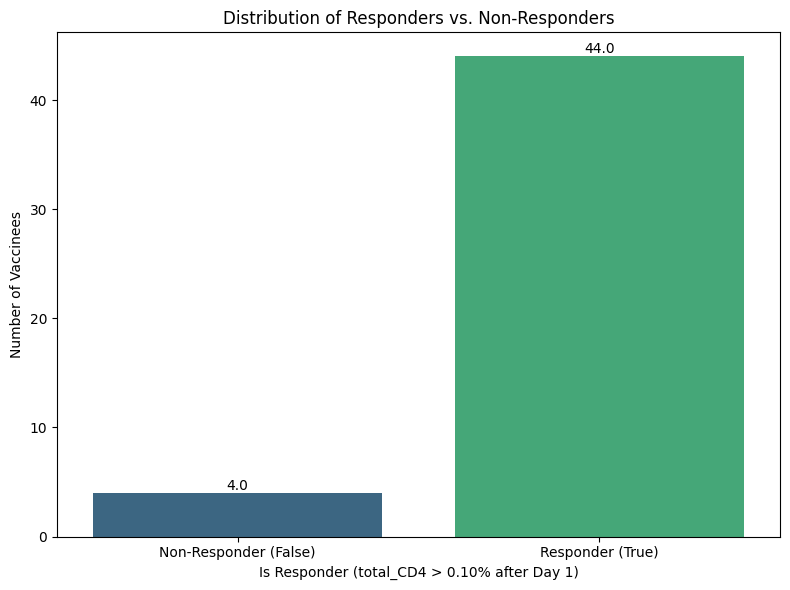

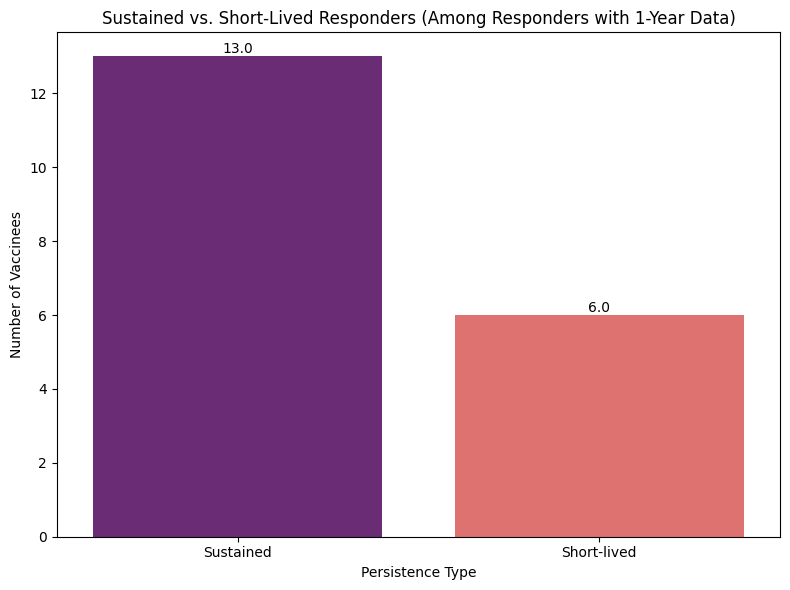

In [ ]:
# @title
# Plot 1: Responders vs Non-Responders
plt.figure(figsize=(8, 6))
sns.countplot(x='is_responder', data=vaccinee_results, hue='is_responder', palette='viridis', legend=False)
plt.title('Distribution of Responders vs. Non-Responders')
plt.xlabel('Is Responder (total_CD4 > 0.10% after Day 1)')
plt.ylabel('Number of Vaccinees')
plt.xticks(ticks=[0, 1], labels=['Non-Responder (False)', 'Responder (True)']) # Explicit labels for clarity
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.tight_layout()
plt.show()

# Plot 2: Sustained vs Short-Lived Responders (among responders with 1-year data)
# Filter for responders who have 1-year data and are either sustained or short-lived
filtered_for_1y_responders = vaccinee_results[vaccinee_results['is_responder'] & vaccinee_results['has_1y_data']].copy() # .copy() added here

# Create a new column to categorize as 'Sustained' or 'Short-lived'
filtered_for_1y_responders['persistence_type'] = filtered_for_1y_responders.apply(
    lambda row: 'Sustained' if row['is_sustained'] else ('Short-lived' if row['is_short_lived'] else 'Undefined'),
    axis=1
)

# Exclude 'Undefined' if any, though based on logic there shouldn't be any here
persistence_data = filtered_for_1y_responders[filtered_for_1y_responders['persistence_type'] != 'Undefined']

if not persistence_data.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='persistence_type', data=persistence_data, hue='persistence_type', palette='magma', legend=False) # hue and legend=False added here
    plt.title('Sustained vs. Short-Lived Responders (Among Responders with 1-Year Data)')
    plt.xlabel('Persistence Type')
    plt.ylabel('Number of Vaccinees')
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                           textcoords='offset points')
    plt.tight_layout()
    plt.show()
else:
    print("No responders with 1-year data classified as sustained or short-lived to plot.")


# Task 5 - Memory bias & persistence features (for modelling)

### Goal: Calculate features that will later inform the CD4 model parameters, especially how memory-biased and persistent each subject is.
For each responder:
- Peak metrics (before day 60):
  - peak_TSCM = maximum TSCM before day 60
  - peak_TCM = maximum TCM before day 60
  - peak_TEMRA = maximum TEMRA before day 60
  - peak_total_CD4 = maximum (TSCM + TCM + TEMRA) before day 60
- Ratios at peak (memory vs terminal):
  - memory_fraction_peak = (peak_TSCM + peak_TCM) / (peak_total_CD4 + 0.001)
→ fraction of the peak that is memory-like (TSCM+TCM).
  - TEMRA_fraction_peak = peak_TEMRA / (peak_total_CD4 + 0.001)
→ fraction of the peak that is TEMRA (terminal-like).
- Memory fraction at 1 year (if 1-year data exist):
  - memory_fraction_1y = (TSCM_1y + TCM_1y) / (TSCM_1y + TCM_1y + TEMRA_1y + 0.001)
- Plots:
  - SCATTER: memory_fraction_peak vs memory_fraction_1y
(only for subjects with 1-year data).
  - HISTOGRAM: distribution of memory_fraction_peak.
- Classification (based on memory_fraction_peak):
  - Memory-dominant: memory_fraction_peak > 0.70
  - Effector/TEMRA-skewed: memory_fraction_peak < 0.40
  - Balanced: 0.40 ≤ memory_fraction_peak ≤ 0.70
### Deliverable 5:
- A table with one row per responder containing:
  - peak_total_CD4, memory_fraction_peak, TEMRA_fraction_peak,
  - memory_fraction_1y (if available),
  - and their classification (memory-dominant / balanced / TEMRA-skewed).
-	The plots described above.
-	A short paragraph answering:
“What range of memory_fraction_peak values does our future model (frac_S and memory death rates) need to cover to represent all subjects?”

- From the ranges you find, we will later choose reasonable parameter ranges for:
  -	frac_S (probability to enter the TSCM/TCM path),
  -	d_S, d_C (decay rates of TSCM/TCM),
  -	d_R (decay rate of TEMRA).


In [ ]:
# 1. Identify responder IDs
responder_ids = vaccinee_results[vaccinee_results['is_responder']].index.tolist()

# 2. Create an empty list to store dictionaries
responder_features_list = []

# 3. Iterate through each unique responder ID
for vaccinee_id in responder_ids:
    responder_data = {'Vaccinee': vaccinee_id}

    # a. Filter data before day 60
    df_pre_60 = df[(df['Vaccinee'] == vaccinee_id) & (df['Time_Point'] < 60)].copy()

    # b. Calculate peak metrics (before day 60)
    if not df_pre_60.empty:
        responder_data['peak_TSCM'] = df_pre_60['TSCM_response'].max()
        responder_data['peak_TCM'] = df_pre_60['Tcm_response'].max()
        responder_data['peak_TEMRA'] = df_pre_60['Temra_response'].max()
        responder_data['peak_total_CD4'] = df_pre_60['total_CD4'].max()
    else:
        # If no data before day 60, peaks are 0
        responder_data['peak_TSCM'] = 0.0
        responder_data['peak_TCM'] = 0.0
        responder_data['peak_TEMRA'] = 0.0
        responder_data['peak_total_CD4'] = 0.0

    # c. Calculate memory_fraction_peak
    denominator_peak = responder_data['peak_total_CD4'] + 0.001
    responder_data['memory_fraction_peak'] = (responder_data['peak_TSCM'] + responder_data['peak_TCM']) / denominator_peak

    # d. Calculate TEMRA_fraction_peak
    responder_data['TEMRA_fraction_peak'] = responder_data['peak_TEMRA'] / denominator_peak

    # e. Filter data for 1-year time points
    df_1y = df[(df['Vaccinee'] == vaccinee_id) & (df['Time_Point'].isin([356, 365]))].copy()

    # f. If 1-year data exists for the responder
    if not df_1y.empty:
        # i. Calculate average responses at 1 year
        TSCM_1y = df_1y['TSCM_response'].mean()
        TCM_1y = df_1y['Tcm_response'].mean()
        TEMRA_1y = df_1y['Temra_response'].mean()

        # ii. Calculate memory_fraction_1y
        denominator_1y = TSCM_1y + TCM_1y + TEMRA_1y + 0.001
        responder_data['memory_fraction_1y'] = (TSCM_1y + TCM_1y) / denominator_1y
    else:
        # g. If no 1-year data, set memory_fraction_1y to np.nan
        responder_data['memory_fraction_1y'] = np.nan

    # h. Store all calculated features
    responder_features_list.append(responder_data)

# 4. Convert the list of dictionaries into a new Pandas DataFrame
responder_features_df = pd.DataFrame(responder_features_list)

def classify_memory_bias(memory_fraction_peak):
    if memory_fraction_peak > 0.70:
        return 'Memory-dominant'
    elif memory_fraction_peak < 0.40:
        return 'Effector/TEMRA-skewed'
    else:
        return 'Balanced'

# Apply the classification function to create the new column
responder_features_df['classification'] = responder_features_df['memory_fraction_peak'].apply(classify_memory_bias)

print("Responder features DataFrame with classification:")
print(responder_features_df)


Responder features DataFrame with classification:
   Vaccinee  peak_TSCM  peak_TCM  peak_TEMRA  peak_total_CD4  \
0     TYF01   1.155476  2.760006    0.178442        4.093924   
1     TYF02   1.244919  1.556742    0.224511        3.026173   
2     TYF03   0.042885  0.224471    0.040296        0.263194   
3     TYF04   0.295617  0.398052    0.091580        0.701930   
4     TYF05   0.458351  1.261490    0.145185        1.865026   
5     TYF06   0.664191  1.321052    0.367570        2.352812   
6     TYF07   0.228703  0.975385    0.127713        1.239517   
7     TYF08   0.308619  0.574159    0.103265        0.986042   
8     TYF09   0.828641  0.179599    0.117988        1.126228   
9     TYF10   0.256223  0.471764    0.045410        0.773397   
10    TYF11   0.161921  0.486152    0.094781        0.708989   
11    TYF12   0.358713  1.194459    0.110938        1.657590   
12    TYF13   0.171811  0.516211    0.068601        0.750880   
13    TYF14   0.118615  0.637431    0.052864        0.

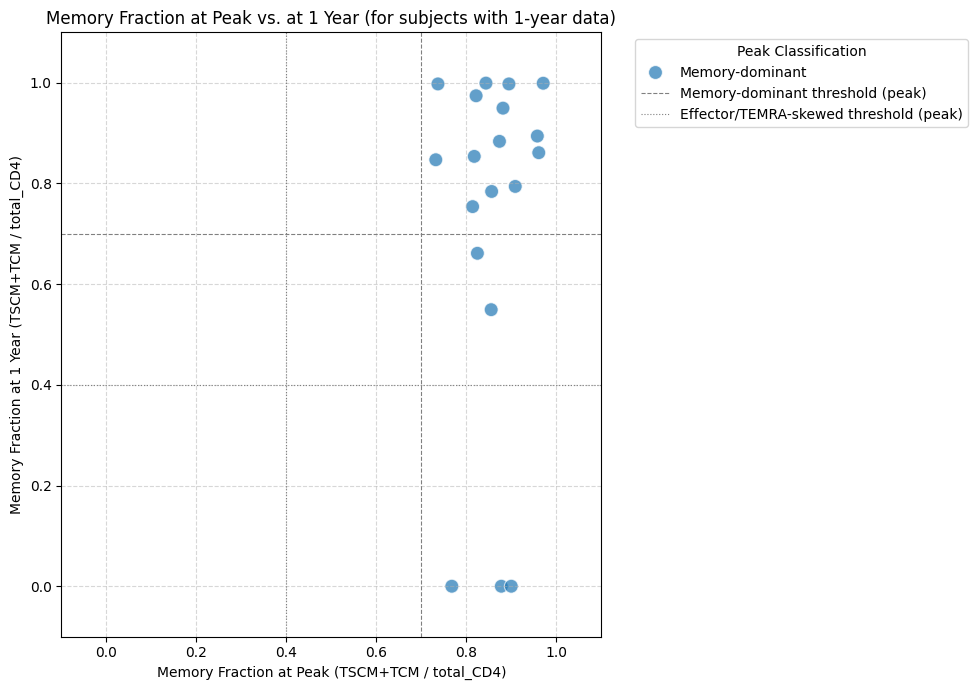

In [ ]:
# Filter for subjects with 1-year data for the scatter plot
scatter_data = responder_features_df.dropna(subset=['memory_fraction_1y'])

if not scatter_data.empty:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=scatter_data, x='memory_fraction_peak', y='memory_fraction_1y', hue='classification', s=100, alpha=0.7)
    plt.title('Memory Fraction at Peak vs. at 1 Year (for subjects with 1-year data)')
    plt.xlabel('Memory Fraction at Peak (TSCM+TCM / total_CD4)')
    plt.ylabel('Memory Fraction at 1 Year (TSCM+TCM / total_CD4)')
    plt.xlim(-0.1, 1.1) # Set limits slightly beyond 0-1 range to ensure visibility of outliers
    plt.ylim(-0.1, 1.1)
    plt.axhline(0.70, color='grey', linestyle='--', linewidth=0.8, label='Memory-dominant threshold (peak)')
    plt.axvline(0.70, color='grey', linestyle='--', linewidth=0.8)
    plt.axhline(0.40, color='grey', linestyle=':', linewidth=0.8, label='Effector/TEMRA-skewed threshold (peak)')
    plt.axvline(0.40, color='grey', linestyle=':', linewidth=0.8)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Peak Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No responders with 1-year data to plot memory_fraction_peak vs memory_fraction_1y.")

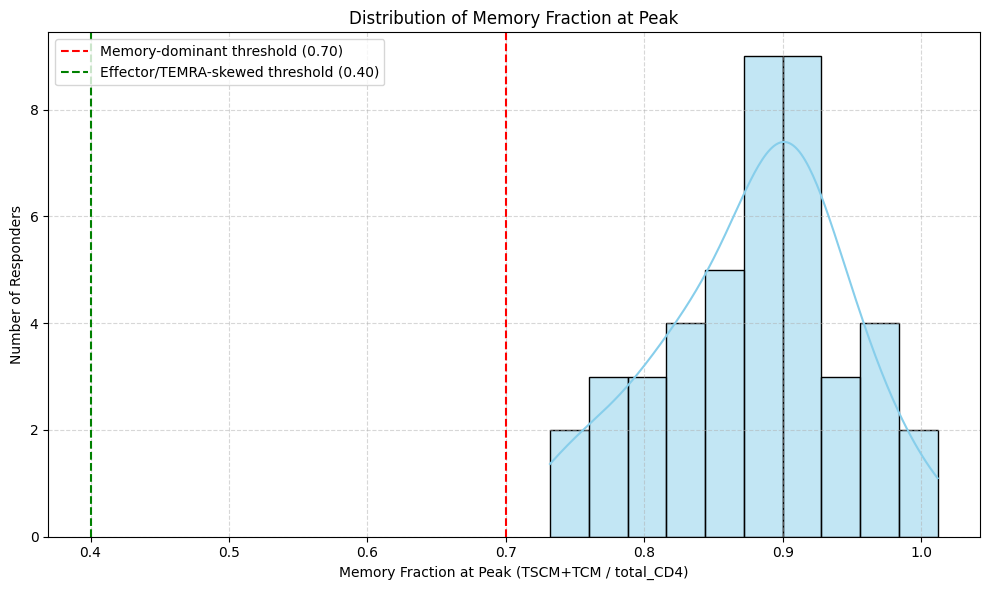

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(responder_features_df['memory_fraction_peak'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Memory Fraction at Peak')
plt.xlabel('Memory Fraction at Peak (TSCM+TCM / total_CD4)')
plt.ylabel('Number of Responders')
plt.axvline(0.70, color='red', linestyle='--', label='Memory-dominant threshold (0.70)')
plt.axvline(0.40, color='green', linestyle='--', label='Effector/TEMRA-skewed threshold (0.40)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()